In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
dataset=pd.read_csv("dataset.csv",sep=";")

In [3]:
dataset.drop(["node"],inplace=True,axis=1)

In [4]:
dataset["date"]=pd.to_datetime(dataset["date"],format="%Y-%m-%d %H:%M:%S")

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2242968 entries, 0 to 2242967
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   consumption  float64       
 1   substation   object        
 2   date         datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 51.3+ MB


In [6]:
dataset.head()

,consumption,substation,date
0,-2.762882,AJAHUEL,2017-04-01
1,-119.559726,BUIN,2017-04-01
2,64.807776,BUIN,2017-04-01
3,-4.348032,LOSALME,2017-04-01
4,69.637895,LOSALME,2017-04-01


In [7]:
train=dataset.query("date.dt.year>2017 and date.dt.year <2022")

In [8]:
test=dataset.query("date.dt.year==2022")

In [9]:
serie_test=test.groupby(["substation","date"]).agg("sum")
serie_test.to_csv("test.csv")

In [10]:
serie_train=train.groupby(["substation","date"]).agg("sum")
serie_train.to_csv("train.csv")

In [11]:
ds_train=pd.read_csv("train.csv")
ds_train["date"]=pd.to_datetime(ds_train["date"],format="%Y-%m-%d %H:%M:%S")
ds_train=ds_train.set_index("date")
ds_train.head()

,substation,consumption
date,,
2018-01-01 00:00:00,AJAHUEL,137.330840
2018-01-01 01:00:00,AJAHUEL,124.045549
2018-01-01 02:00:00,AJAHUEL,118.137811
2018-01-01 03:00:00,AJAHUEL,107.899499
2018-01-01 04:00:00,AJAHUEL,100.362069


In [12]:
ds_test=pd.read_csv("test.csv")
ds_test["date"]=pd.to_datetime(ds_test["date"],format="%Y-%m-%d %H:%M:%S")
ds_test=ds_test.set_index("date")
ds_test.head()

,substation,consumption
date,,
2022-01-01 00:00:00,AJAHUEL,102.093131
2022-01-01 01:00:00,AJAHUEL,82.379086
2022-01-01 02:00:00,AJAHUEL,75.126780
2022-01-01 03:00:00,AJAHUEL,69.140084
2022-01-01 04:00:00,AJAHUEL,66.442176


In [13]:
subestaciones=["AJAHUEL","BUIN","CHENA","CNAVIA","ELSALTO","FLORIDA","LOSALME"]

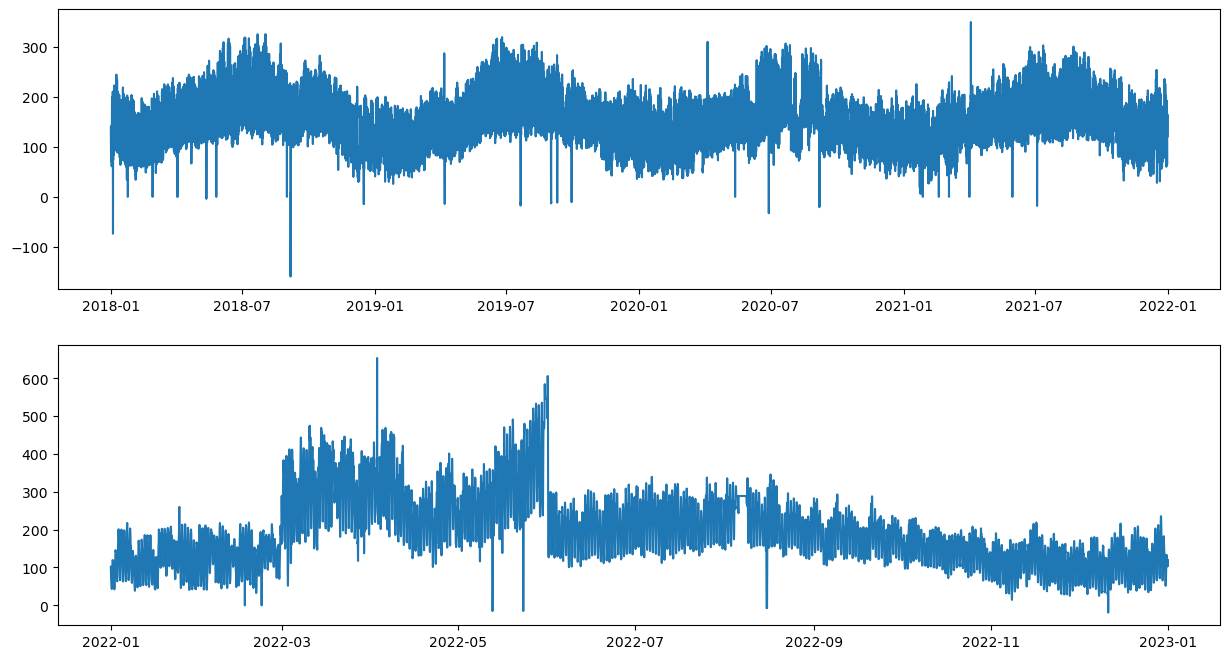

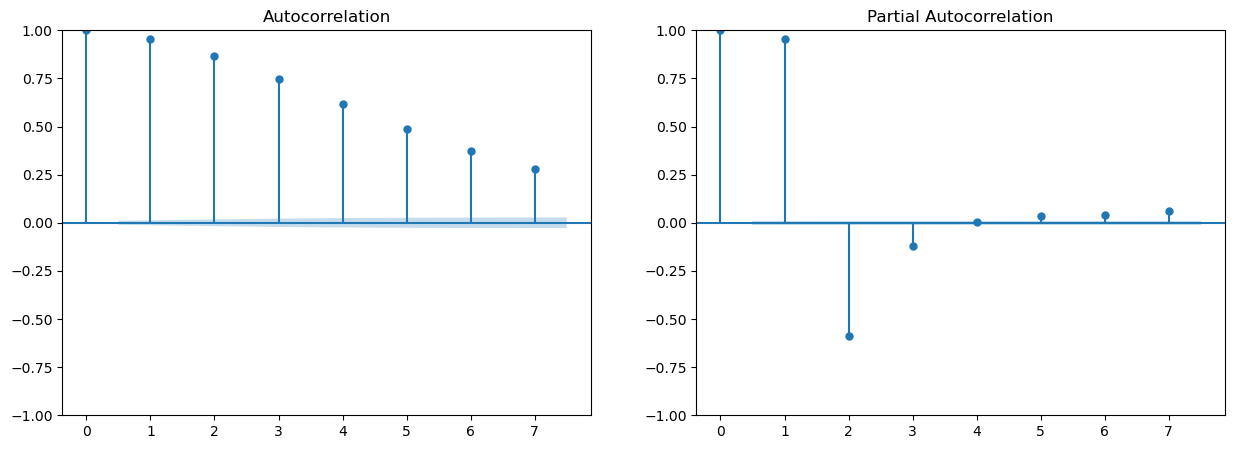

In [14]:
subestacion="AJAHUEL"
filtro="substation=='{0}'".format(subestacion)
y=ds_train.query(filtro)["consumption"]
x=ds_train.query(filtro).index
yt=ds_test.query(filtro)["consumption"]
xt=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(x,y);
axes[1].plot(xt,yt);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(y,lags=7,ax=axes[0]);
plot_pacf(y,lags=7,method="ywm",ax=axes[1]);

<Axes: xlabel='hour', ylabel='consumption'>

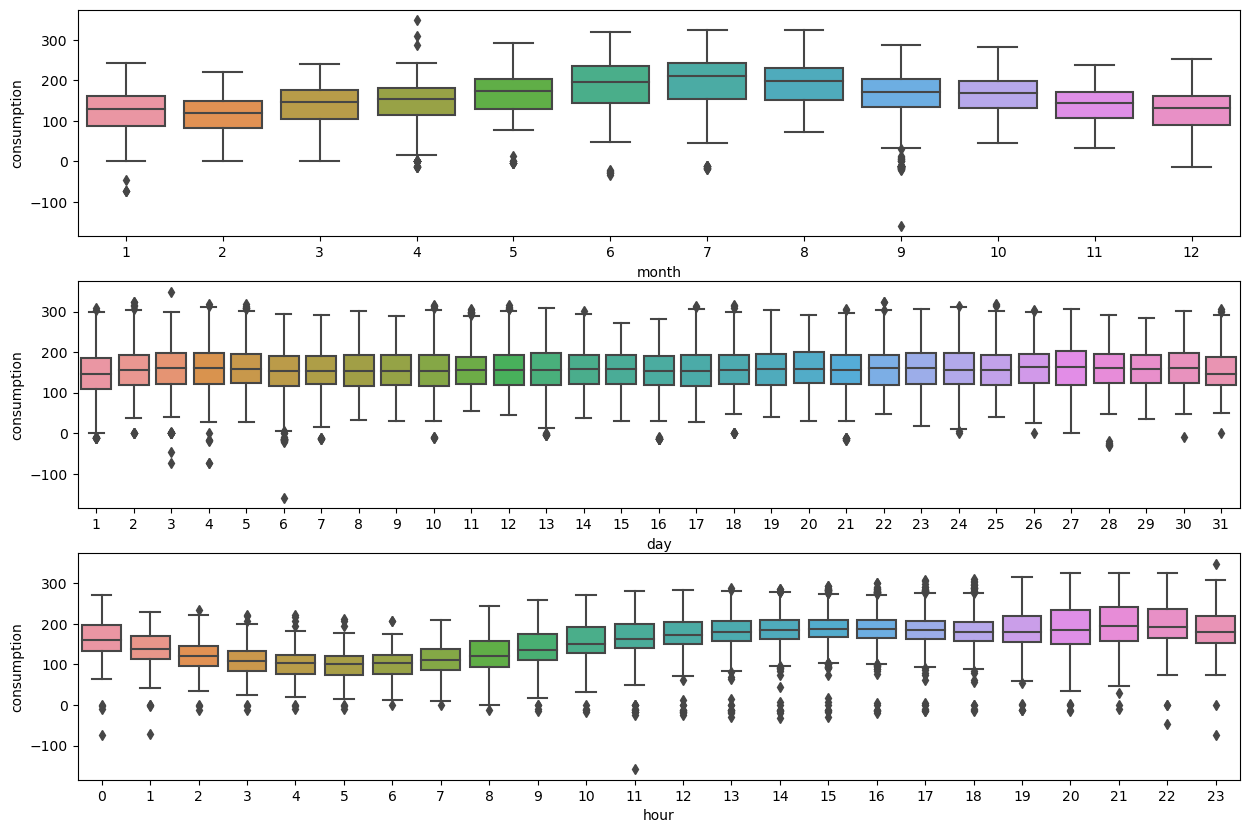

In [15]:
import seaborn as sns

data=pd.DataFrame()
data["consumption"]=y
data["date"]=y.index
data["day"]=data["date"].dt.day
data["hour"]=data["date"].dt.hour
data["month"]=data["date"].dt.month

fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 10)

sns.boxplot(x="month", y="consumption",data=data,ax=axes[0])
sns.boxplot(x="day", y="consumption",data=data,ax=axes[1])
sns.boxplot(x="hour", y="consumption",data=data,ax=axes[2])

In [17]:
data["year"]=data["date"].dt.year
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34913 entries, 2018-01-01 00:00:00 to 2021-12-31 23:00:00
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   consumption  34913 non-null  float64       
 1   date         34913 non-null  datetime64[ns]
 2   day          34913 non-null  int64         
 3   hour         34913 non-null  int64         
 4   month        34913 non-null  int64         
 5   year         34913 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.9 MB


In [30]:
data_ys_ajahuel=data[["year","month","day","consumption"]].groupby(["year","month","day"]).agg("mean")
data_ys_ajahuel.to_csv("data_ys_ajahuel.csv")

In [31]:
from datetime import datetime
ys=[]
xs=[]
archivo=open("data_ys_ajahuel.csv")
archivo.readline()
for linea in archivo:
    linea=linea.strip().split(",")
    ys.append(float(linea[3]))
    fecha=str(linea[0])+"-"+str(linea[1]).zfill(2)+"-"+str(linea[2]).zfill(2)
    xs.append(datetime.strptime(fecha,"%Y-%m-%d"))

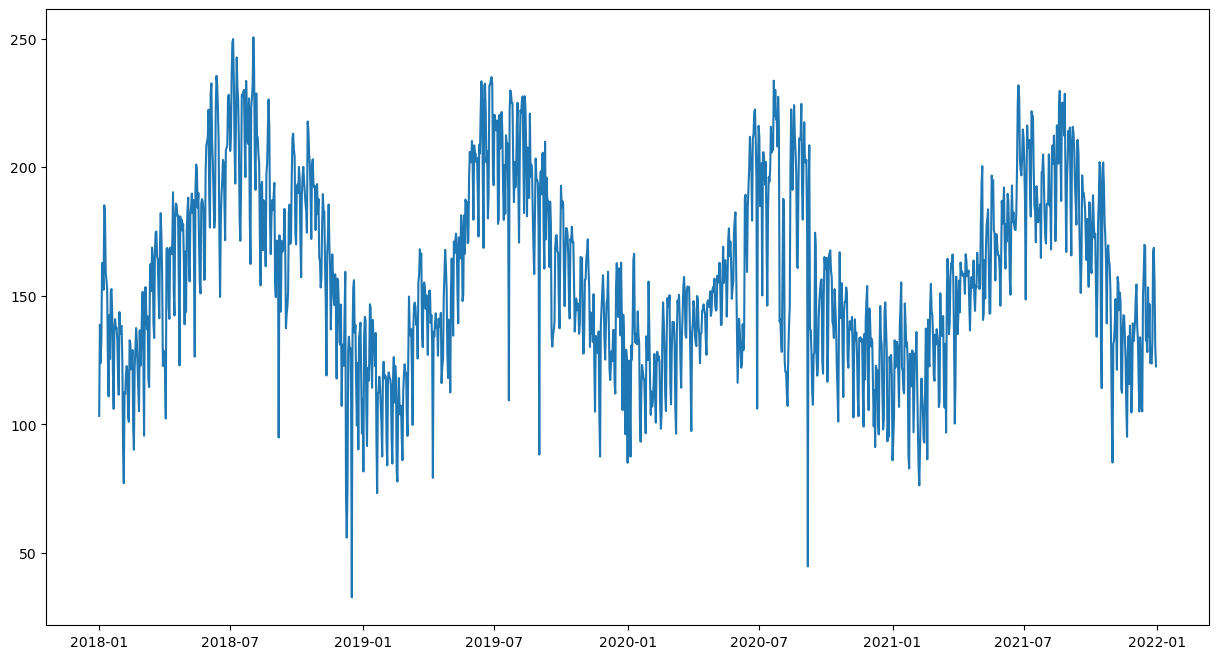

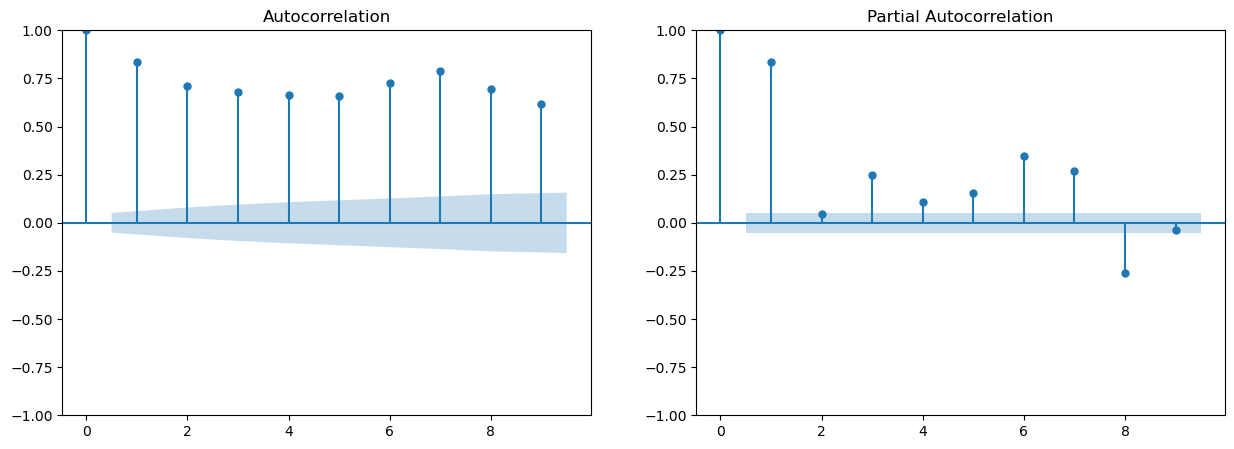

In [20]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ys,lags=9,ax=axes[0]);
plot_pacf(ys,lags=9,method="ywm",ax=axes[1]);

In [21]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ys)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.507892
p-value: 0.113566
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [22]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
modelo_ajahuel_d=ARIMA(ys,order=(8,0,8))
m_ad1=modelo_ajahuel_d.fit()
print("MSE",m_ad1.mse)
print("AIC",m_ad1.aic)
ysp=m_ad1.predict()
mape=mean_absolute_percentage_error(ys,ysp)
print("MAPE",mape)

MSE 217.6162909553788
AIC 12040.620774857784
MAPE 0.07247093938061677


C:\Users\Pc-ADS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


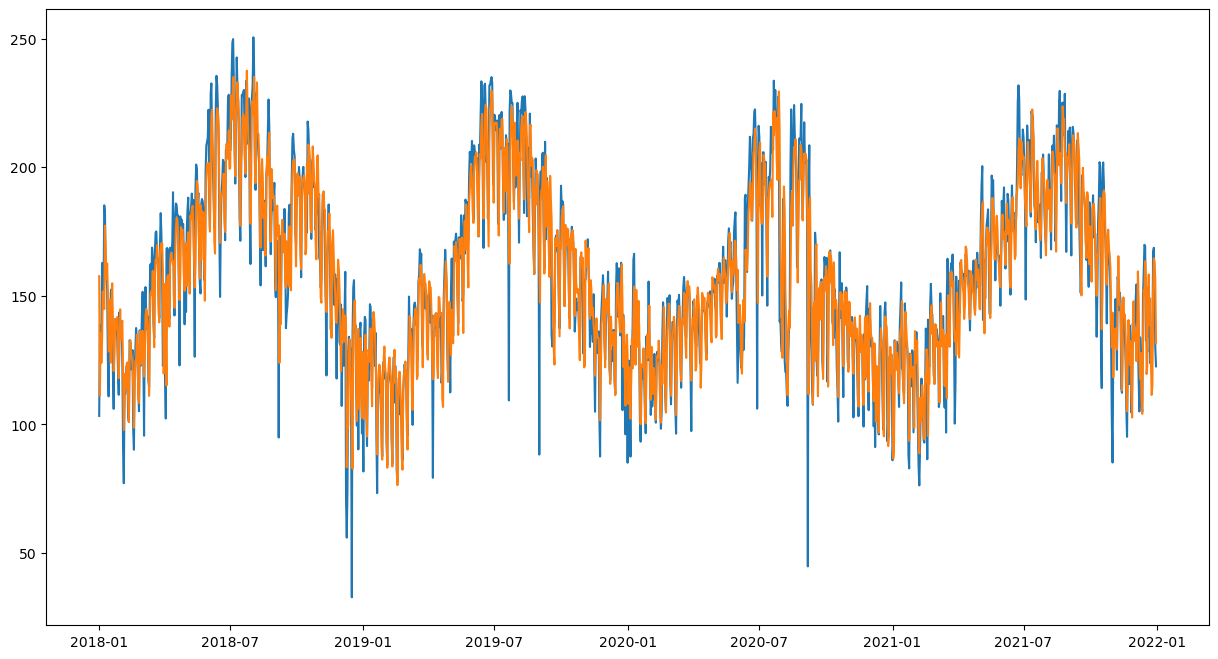

In [24]:
fig, axes = plt.subplots(1,1)
fig.set_size_inches(15, 8)
axes.plot(xs,ys,xs,ysp);

In [25]:
yw=[]
yt=[]
window=8
for i in range(0,len(ys)):
    if i+window < len(ys):
        row=[]
        for j in range(window):
            row.append(ys[i+j])
        yw.append(row)
        yt.append(ys[i+window])
    else:
        break
print(len(yw))

1453


In [26]:
yw=np.asarray(yw)
yt=np.asarray(yt)

In [27]:
import tensorflow as tf
from datetime import datetime
from tensorflow import keras
from keras.layers import SimpleRNN, Input, Dense
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import random as rd

In [28]:
seed=12122008
rd.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [29]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200,verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200


6/6 [==============================] - 2s 41ms/step - loss: 23726.6953 - mse: 23726.6953 - mae: 149.6146 - mape: 94.5401
Epoch 2/200
6/6 [==============================] - 0s 21ms/step - loss: 17409.6250 - mse: 17409.6250 - mae: 126.6764 - mape: 79.0809
Epoch 3/200
6/6 [==============================] - 0s 21ms/step - loss: 12111.6162 - mse: 12111.6162 - mae: 103.8549 - mape: 63.9318
Epoch 4/200
6/6 [==============================] - 0s 21ms/step - loss: 7647.6953 - mse: 7647.6953 - mae: 79.4881 - mape: 47.6643
Epoch 5/200
6/6 [==============================] - 0s 21ms/step - loss: 4231.8857 - mse: 4231.8857 - mae: 55.2805 - mape: 32.1820
Epoch 6/200
6/6 [==============================] - 0s 20ms/step - loss: 2188.7053 - mse: 2188.7053 - mae: 36.8121 - mape: 21.7522
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 1379.5703 - mse: 1379.5703 - mae: 30.0663 - mape: 19.8460
Epoch 8/200
6/6 [==============================] - 0s 21ms/step - loss: 1345.99

6/6 [==============================] - 0s 21ms/step - loss: 283.6256 - mse: 283.6256 - mae: 12.3692 - mape: 8.7188
Epoch 124/200
6/6 [==============================] - 0s 21ms/step - loss: 295.8917 - mse: 295.8917 - mae: 12.7340 - mape: 8.9984
Epoch 125/200
6/6 [==============================] - 0s 20ms/step - loss: 274.2259 - mse: 274.2259 - mae: 12.0824 - mape: 8.6916
Epoch 126/200
6/6 [==============================] - 0s 20ms/step - loss: 272.2814 - mse: 272.2814 - mae: 12.0386 - mape: 8.4537
Epoch 127/200
6/6 [==============================] - 0s 22ms/step - loss: 252.7721 - mse: 252.7721 - mae: 11.6232 - mape: 8.1479
Epoch 128/200
6/6 [==============================] - 0s 21ms/step - loss: 257.4434 - mse: 257.4434 - mae: 11.6919 - mape: 8.2167
Epoch 129/200
6/6 [==============================] - 0s 20ms/step - loss: 252.3379 - mse: 252.3379 - mae: 11.5963 - mape: 8.1906
Epoch 130/200
6/6 [==============================] - 0s 20ms/step - loss: 247.0511 - mse: 247.0511 - mae: 11.37

46/46 [==============================] - 0s 2ms/step


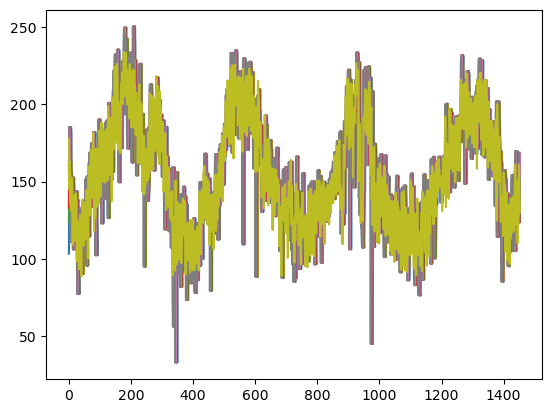

In [31]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [32]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


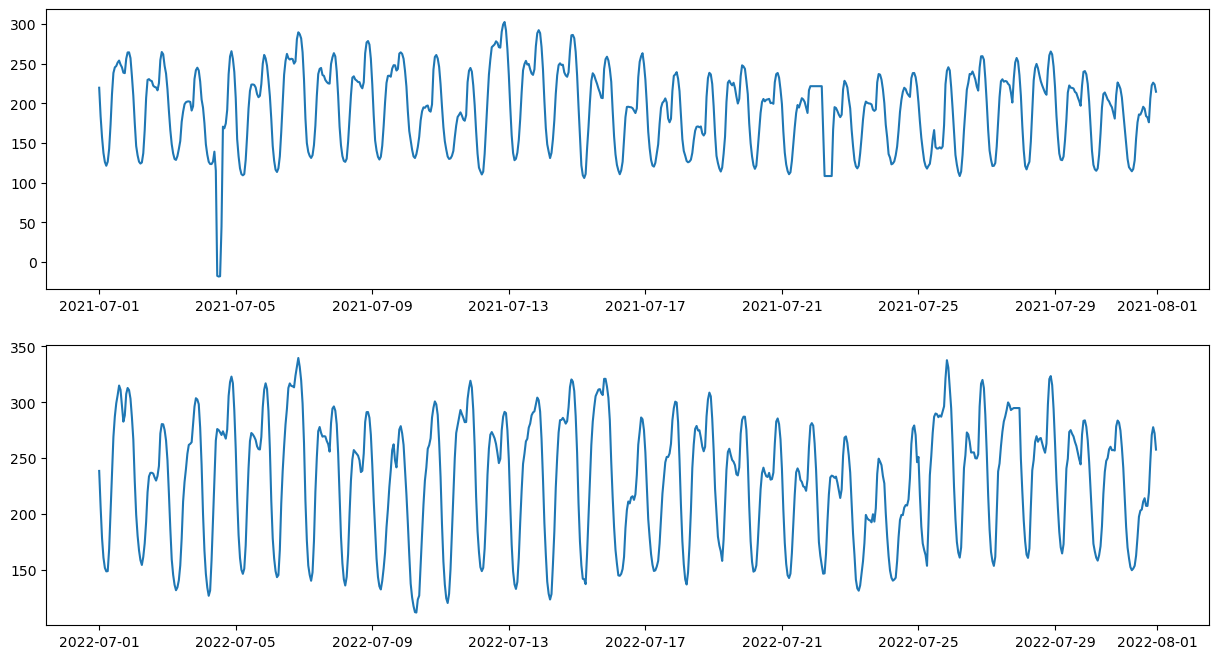

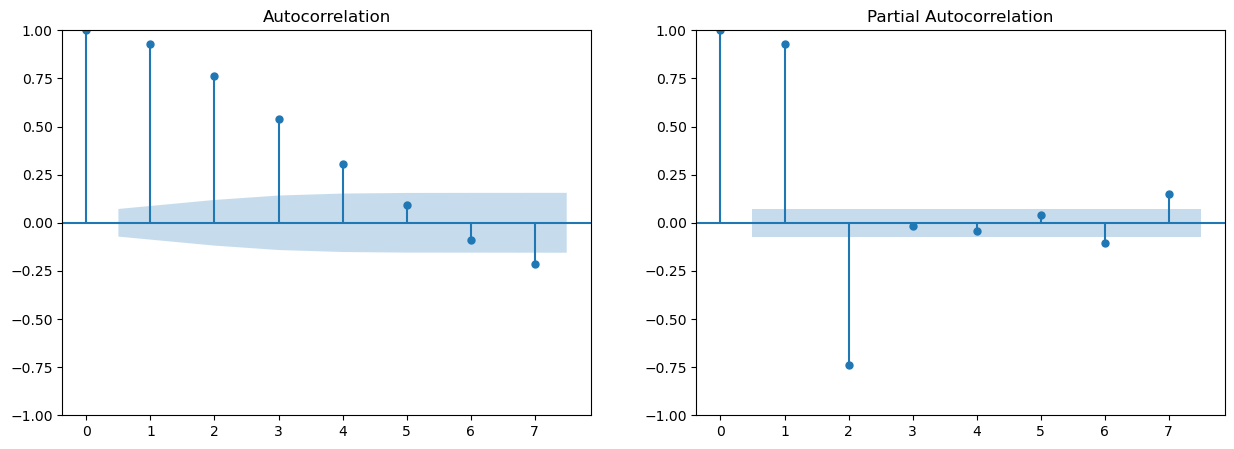

In [33]:
subestacion="AJAHUEL"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==7".format(subestacion)
ym=ds_train.query(filtro)["consumption"]
xm=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==7".format(subestacion)
ytm=ds_test.query(filtro)["consumption"]
xtm=ds_test.query(filtro).index
fig, axes = plt.subplots(2,1)
fig.set_size_inches(15, 8)
axes[0].plot(xm,ym);
axes[1].plot(xtm,ytm);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(ym,lags=7,ax=axes[0]);
plot_pacf(ym,lags=7,method="ywm",ax=axes[1]);

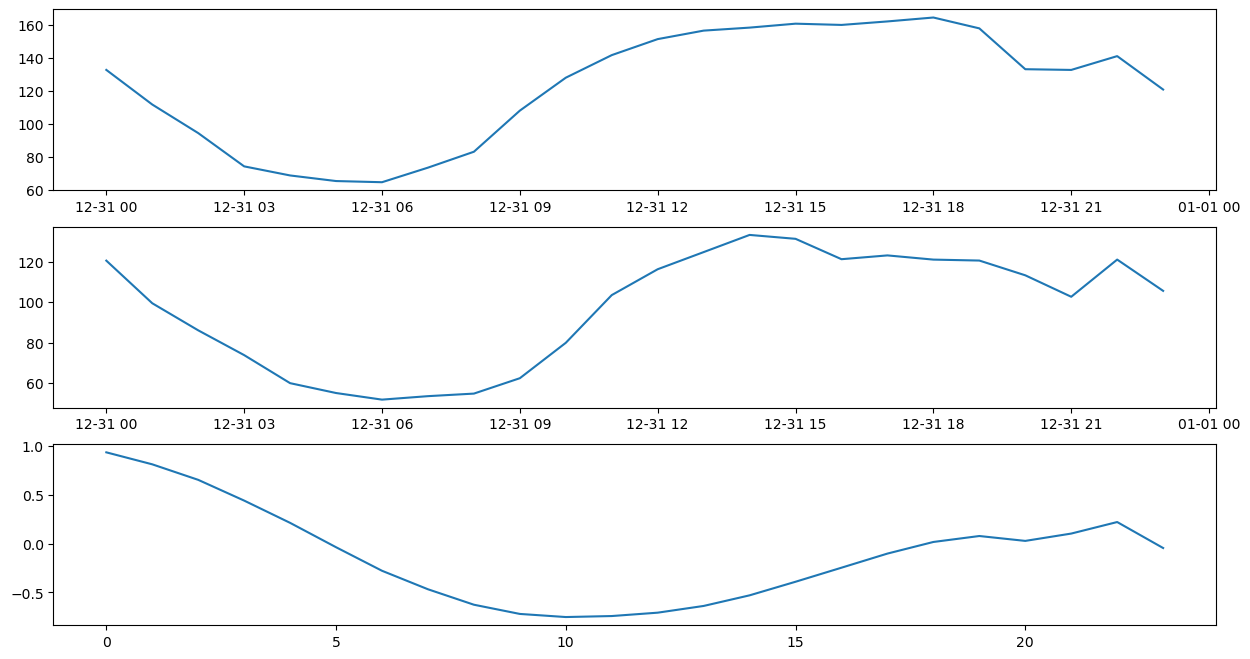

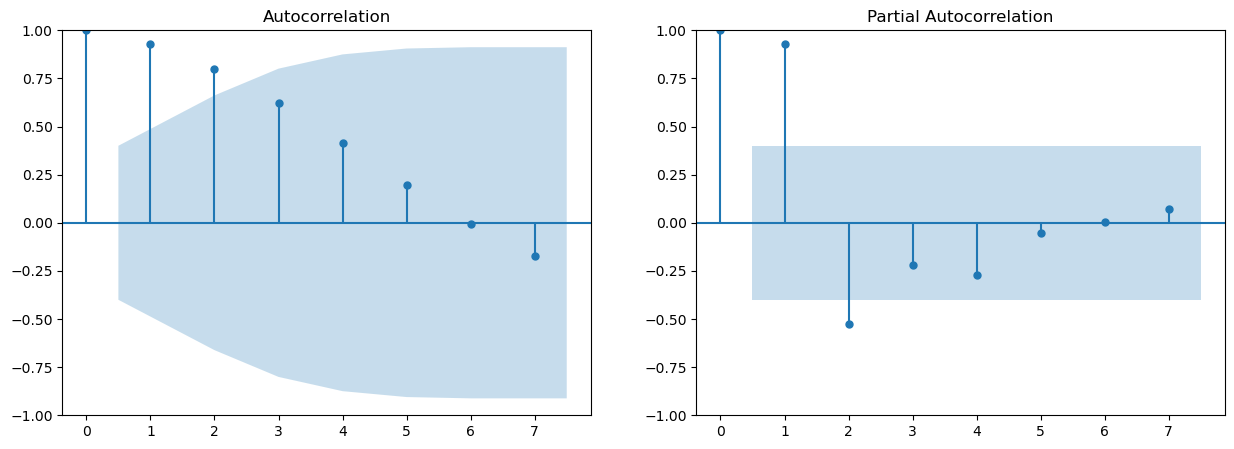

In [34]:
subestacion="AJAHUEL"
filtro="substation=='{0}' and date.dt.year==2021 and date.dt.month==12 and date.dt.day==31".format(subestacion)
yd=ds_train.query(filtro)["consumption"]
xd=ds_train.query(filtro).index
filtro="substation=='{0}' and date.dt.year==2022 and date.dt.month==12 and date.dt.day==31".format(subestacion)
ytd=ds_test.query(filtro)["consumption"]
xtd=ds_test.query(filtro).index
c_yd_ytd=sm.tsa.stattools.ccf(yd, ytd);
fig, axes = plt.subplots(3,1)
fig.set_size_inches(15, 8)
axes[0].plot(xd,yd);
axes[1].plot(xtd,ytd);
axes[2].plot(c_yd_ytd);
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15, 5)
plot_acf(yd,lags=7,ax=axes[0]);
plot_pacf(yd,lags=7,method="ywm",ax=axes[1]);

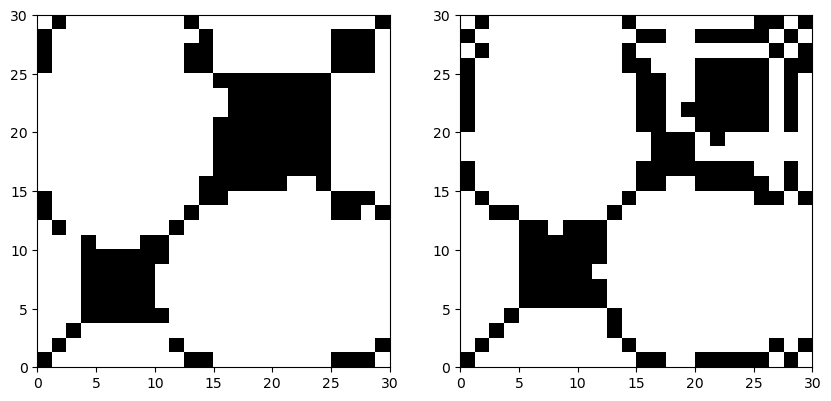

In [35]:
from pyts.image import RecurrencePlot
#Matriz de recurrencia
rp = RecurrencePlot(threshold=10)
y_rp = rp.transform(np.array([yd]))
yt_rp = rp.transform(np.array([ytd]))

fig, axes = plt.subplots(1,2)
fig.set_size_inches(10, 5)
axes[0].imshow(y_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);
axes[1].imshow(yt_rp[0], cmap='binary', origin='lower',extent=[0, 30, 0, 30]);

#### Matriz de recurrencia

La matriz de recurrencia muestra todos los momentos en los que un estado específico (una combinación particular de valores de variables) se repite en una serie de tiempo.

Cada punto en el gráfico representa un estado específico en la serie de tiempo.
Los bloques oscuros en los gráficos indican recurrencia; es decir, momentos en los que el sistema ha visitado estados similares previamente.

Observaciones específicas:
- Primer Gráfico (Datos de Entrenamiento):
Tiene una estructura similar a una “L” invertida con un bloque negro grande en la parte superior derecha.
Esto sugiere que ciertos estados se repiten en los datos de entrenamiento.
- Segundo Gráfico (Datos de Prueba):
Tiene una estructura similar a una “X”, con un bloque negro adicional grande en la parte superior derecha.
También muestra recurrencia, pero con patrones ligeramente diferentes a los datos de entrenamiento.

Significado:
Los Recurrence Plots ayudan a identificar patrones, ciclos y regularidades en los datos.
La presencia de bloques oscuros indica que ciertos estados se repiten, lo que puede ser útil para modelar y predecir el comportamiento futuro.

In [41]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
tag="rnn"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model.fit(yw, yt, batch_size=256, epochs=200, shuffle=True, verbose=1,callbacks=[tensorboard_callback])
model.save(log_dir+'/model_{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 1s 21ms/step - loss: 24557.5742 - mse: 24557.5742 - mae: 152.4145 - mape: 96.4443
Epoch 2/200
6/6 [==============================] - 0s 21ms/step - loss: 18481.5078 - mse: 18481.5078 - mae: 130.8794 - mape: 81.9089
Epoch 3/200
6/6 [==============================] - 0s 21ms/step - loss: 13175.0898 - mse: 13175.0898 - mae: 108.8738 - mape: 67.2850
Epoch 4/200
6/6 [==============================] - 0s 20ms/step - loss: 8576.6191 - mse: 8576.6191 - mae: 85.1332 - mape: 51.4172
Epoch 5/200
6/6 [==============================] - 0s 21ms/step - loss: 4931.0405 - mse: 4931.0405 - mae: 60.8257 - mape: 35.6314
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 2588.4907 - mse: 2588.4907 - mae: 40.6446 - mape: 23.7141
Epoch 7/200
6/6 [==============================] - 0s 21ms/step - loss: 1493.8408 - mse: 1493.8408 - mae: 30.8065 - mape: 19.6389
Epoch 8/200
6/6 [==============================] - 0s 20ms/step - loss: 1306.9802

6/6 [==============================] - 0s 21ms/step - loss: 266.8581 - mse: 266.8581 - mae: 11.9719 - mape: 8.4010
Epoch 128/200
6/6 [==============================] - 0s 21ms/step - loss: 261.7446 - mse: 261.7446 - mae: 11.7490 - mape: 8.2916
Epoch 129/200
6/6 [==============================] - 0s 21ms/step - loss: 255.0403 - mse: 255.0403 - mae: 11.6203 - mape: 8.2346
Epoch 130/200
6/6 [==============================] - 0s 23ms/step - loss: 250.3792 - mse: 250.3792 - mae: 11.4112 - mape: 8.0504
Epoch 131/200
6/6 [==============================] - 0s 21ms/step - loss: 249.2645 - mse: 249.2645 - mae: 11.4015 - mape: 8.0575
Epoch 132/200
6/6 [==============================] - 0s 21ms/step - loss: 252.2040 - mse: 252.2040 - mae: 11.4377 - mape: 8.0658
Epoch 133/200
6/6 [==============================] - 0s 21ms/step - loss: 249.7826 - mse: 249.7826 - mae: 11.3905 - mape: 8.0578
Epoch 134/200
6/6 [==============================] - 0s 20ms/step - loss: 248.4636 - mse: 248.4636 - mae: 11.35

46/46 [==============================] - 0s 2ms/step


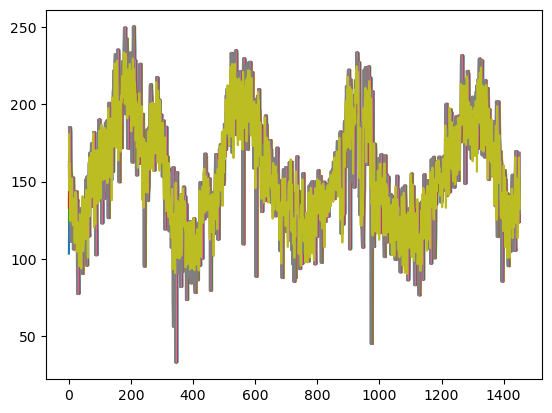

In [43]:
xw=[i for i in range(len(yw))]
yp=model.predict(yw)
plt.plot(xw,yw,xw,yp)

In [38]:
model = Sequential()
model.add(Input(name="serie",shape=(8,1)))
model.add(SimpleRNN(256))
model.add(Dense(128))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 256)               66048     
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99073 (387.00 KB)
Trainable params: 99073 (387.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
from keras.layers import Attention,MultiHeadAttention, Input, Dense, Flatten
from keras.models import Model

In [45]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention, _= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_ajahuel=Model(inputs=input,outputs=output)
model_att_ajahuel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 wq (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wv (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wk (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                              

In [46]:
tag="att_ajahuel_"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_ajahuel.fit(yw, yt, batch_size=256, shuffle=False, epochs=20,verbose=1,callbacks=[tensorboard_callback])
model_att_ajahuel.save(log_dir+'/model_att_ajahuel_{0}.keras'.format(tag))

Epoch 1/20
6/6 [==============================] - 1s 21ms/step - loss: 10393.8027 - mse: 10393.8027 - mae: 82.7608 - mape: 51.6909
Epoch 2/20
6/6 [==============================] - 0s 21ms/step - loss: 3725.9680 - mse: 3725.9680 - mae: 52.5222 - mape: 35.1738
Epoch 3/20
6/6 [==============================] - 0s 22ms/step - loss: 1167.7699 - mse: 1167.7699 - mae: 26.2820 - mape: 17.3352
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 1723.7766 - mse: 1723.7766 - mae: 34.4900 - mape: 21.7148
Epoch 5/20
6/6 [==============================] - 0s 20ms/step - loss: 952.9242 - mse: 952.9242 - mae: 23.7602 - mape: 16.1161
Epoch 6/20
6/6 [==============================] - 0s 20ms/step - loss: 1029.0424 - mse: 1029.0424 - mae: 24.6785 - mape: 16.9703
Epoch 7/20
6/6 [==============================] - 0s 21ms/step - loss: 841.7780 - mse: 841.7780 - mae: 21.5314 - mape: 14.4880
Epoch 8/20
6/6 [==============================] - 0s 20ms/step - loss: 890.1418 - mse: 890.1418 - m

46/46 [==============================] - 0s 2ms/step


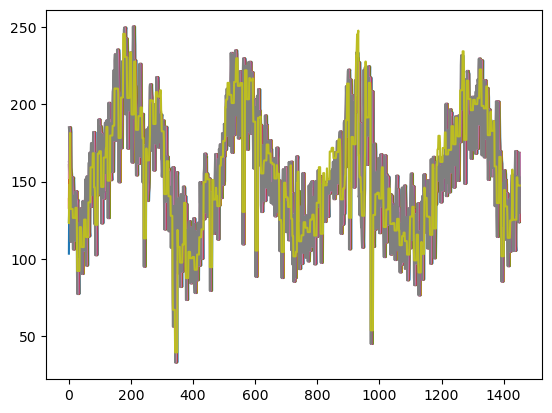

In [48]:
xw=[i for i in range(len(yw))]
yp=model_att_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)

In [51]:
d=128
input=Input(name="activity",shape=(8,1))
q = Dense(name="wq",units=d)(input)
k = Dense(name="wk",units=d)(input)
v = Dense(name="wv",units=d)(input)
attention, _= Attention()([q, v, k],return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_att_ajahuel=Model(inputs=input,outputs=output)
model_att_ajahuel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 wq (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wv (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                                  
 wk (Dense)                  (None, 8, 128)               256       ['activity[0][0]']            
                                                                                            

In [52]:
tag="att_ajahuel_"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_att_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_att_ajahuel.fit(yw, yt, batch_size=256, shuffle=True, epochs=20,verbose=1,callbacks=[tensorboard_callback])
model_att_ajahuel.save(log_dir+'/model_att_ajahuel_{0}.keras'.format(tag))

Epoch 1/20
6/6 [==============================] - 1s 22ms/step - loss: 7302.1030 - mse: 7302.1030 - mae: 68.4851 - mape: 44.2209
Epoch 2/20
6/6 [==============================] - 0s 20ms/step - loss: 3203.6868 - mse: 3203.6868 - mae: 48.2072 - mape: 33.3382
Epoch 3/20
6/6 [==============================] - 0s 20ms/step - loss: 1521.6307 - mse: 1521.6307 - mae: 33.8831 - mape: 21.0349
Epoch 4/20
6/6 [==============================] - 0s 20ms/step - loss: 852.2935 - mse: 852.2935 - mae: 23.7433 - mape: 15.3705
Epoch 5/20
6/6 [==============================] - 0s 20ms/step - loss: 827.6824 - mse: 827.6824 - mae: 21.5661 - mape: 16.1192
Epoch 6/20
6/6 [==============================] - 0s 21ms/step - loss: 506.7276 - mse: 506.7276 - mae: 17.3481 - mape: 12.4497
Epoch 7/20
6/6 [==============================] - 0s 20ms/step - loss: 573.2499 - mse: 573.2499 - mae: 19.5516 - mape: 12.8730
Epoch 8/20
6/6 [==============================] - 0s 21ms/step - loss: 463.5520 - mse: 463.5520 - mae: 16

46/46 [==============================] - 0s 2ms/step


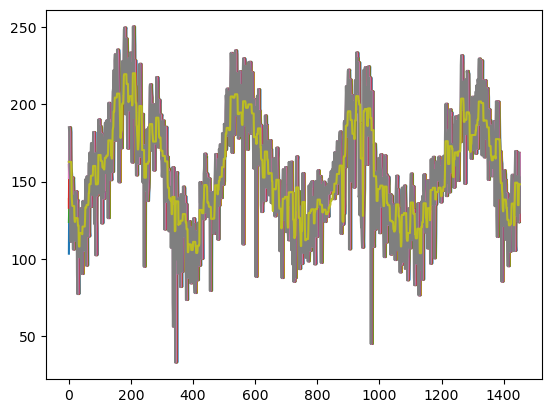

In [53]:
xw=[i for i in range(len(yw))]
yp=model_att_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)

In [56]:
d=128
input=Input(name="activity",shape=(8,1))
attention, _ = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_mhatt_ajahuel=Model(inputs=input,outputs=output)
model_mhatt_ajahuel.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 multi_head_attention_1 (Mu  ((None, 8, 1),               897       ['activity[0][0]',            
 ltiHeadAttention)            (None, 1, 8, 8))                       'activity[0][0]',            
                                                                     'activity[0][0]']            
                                                                                                  
 dense_16 (Dense)            (None, 8, 128)               256       ['multi_head_attention_1[0][0]
                                                                    ']                      

In [61]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_mhatt_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_mhatt_ajahuel.fit(yw, yt, batch_size=256, epochs=200, shuffle=False, verbose=1,callbacks=[tensorboard_callback])
model_mhatt_ajahuel.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 1s 24ms/step - loss: 25508.0273 - mse: 25508.0273 - mae: 155.6188 - mape: 98.6265
Epoch 2/200
6/6 [==============================] - 0s 24ms/step - loss: 18873.5996 - mse: 18873.5996 - mae: 132.9135 - mape: 83.9703
Epoch 3/200
6/6 [==============================] - 0s 23ms/step - loss: 3600.8833 - mse: 3600.8833 - mae: 49.8258 - mape: 30.8260
Epoch 4/200
6/6 [==============================] - 0s 23ms/step - loss: 2664.6233 - mse: 2664.6233 - mae: 45.2680 - mape: 31.9240
Epoch 5/200
6/6 [==============================] - 0s 23ms/step - loss: 1172.6467 - mse: 1172.6467 - mae: 26.3225 - mape: 18.8665
Epoch 6/200
6/6 [==============================] - 0s 25ms/step - loss: 1000.2859 - mse: 1000.2859 - mae: 27.0690 - mape: 16.9702
Epoch 7/200
6/6 [==============================] - 0s 23ms/step - loss: 859.9225 - mse: 859.9225 - mae: 24.5937 - mape: 15.5724
Epoch 8/200
6/6 [==============================] - 0s 23ms/step - loss: 529.8950 - mse

6/6 [==============================] - 0s 24ms/step - loss: 445.4209 - mse: 445.4209 - mae: 16.3680 - mape: 11.6873
Epoch 128/200
6/6 [==============================] - 0s 23ms/step - loss: 445.4257 - mse: 445.4257 - mae: 16.3680 - mape: 11.6873
Epoch 129/200
6/6 [==============================] - 0s 23ms/step - loss: 445.4305 - mse: 445.4305 - mae: 16.3680 - mape: 11.6873
Epoch 130/200
6/6 [==============================] - 0s 23ms/step - loss: 445.4354 - mse: 445.4354 - mae: 16.3680 - mape: 11.6873
Epoch 131/200
6/6 [==============================] - 0s 23ms/step - loss: 445.4404 - mse: 445.4404 - mae: 16.3680 - mape: 11.6873
Epoch 132/200
6/6 [==============================] - 0s 24ms/step - loss: 445.4453 - mse: 445.4453 - mae: 16.3680 - mape: 11.6873
Epoch 133/200
6/6 [==============================] - 0s 24ms/step - loss: 445.4503 - mse: 445.4503 - mae: 16.3680 - mape: 11.6874
Epoch 134/200
6/6 [==============================] - 0s 23ms/step - loss: 445.4553 - mse: 445.4553 - mae

46/46 [==============================] - 0s 2ms/step


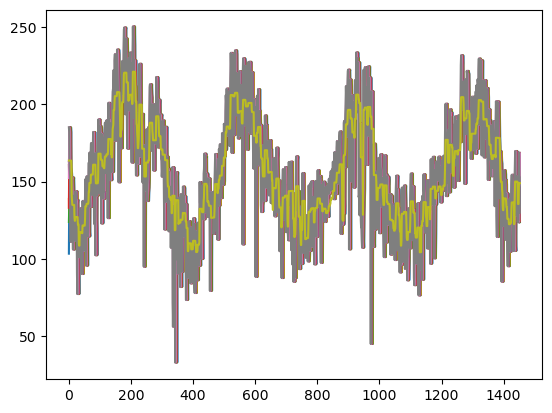

In [62]:
xw=[i for i in range(len(yw))]
yp=model_mhatt_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)

In [63]:
d=128
input=Input(name="activity",shape=(8,1))
attention, _ = MultiHeadAttention(num_heads=1,key_dim=d)(input, input, input,return_attention_scores=True)
hidden=Dense(d, activation='linear')(attention)
flatten=Flatten()(hidden)
output=Dense(1, activation='linear')(flatten)
model_mhatt_ajahuel=Model(inputs=input,outputs=output)
model_mhatt_ajahuel.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 activity (InputLayer)       [(None, 8, 1)]               0         []                            
                                                                                                  
 multi_head_attention_3 (Mu  ((None, 8, 1),               897       ['activity[0][0]',            
 ltiHeadAttention)            (None, 1, 8, 8))                       'activity[0][0]',            
                                                                     'activity[0][0]']            
                                                                                                  
 dense_20 (Dense)            (None, 8, 128)               256       ['multi_head_attention_3[0][0]
                                                                    ']                      

In [64]:
tag="mhatt_chena"+datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/fit/" + tag
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer=Adam(learning_rate=1e-3)

model_mhatt_ajahuel.compile(optimizer="Adam", loss='mse', metrics=['mse','mae','mape'])
rnn = model_mhatt_ajahuel.fit(yw, yt, batch_size=256, epochs=200, shuffle=True, verbose=1,callbacks=[tensorboard_callback])
model_mhatt_ajahuel.save(log_dir+'/model_att_chena{0}.keras'.format(tag))

Epoch 1/200
6/6 [==============================] - 2s 25ms/step - loss: 25579.4707 - mse: 25579.4707 - mae: 155.8781 - mape: 98.8033
Epoch 2/200
6/6 [==============================] - 0s 25ms/step - loss: 18367.7676 - mse: 18367.7676 - mae: 130.8707 - mape: 82.4376
Epoch 3/200
6/6 [==============================] - 0s 24ms/step - loss: 4977.3301 - mse: 4977.3301 - mae: 61.6684 - mape: 38.3452
Epoch 4/200
6/6 [==============================] - 0s 24ms/step - loss: 2148.9834 - mse: 2148.9834 - mae: 38.4489 - mape: 27.1169
Epoch 5/200
6/6 [==============================] - 0s 25ms/step - loss: 1913.2528 - mse: 1913.2528 - mae: 36.2549 - mape: 25.8909
Epoch 6/200
6/6 [==============================] - 0s 26ms/step - loss: 732.4811 - mse: 732.4811 - mae: 22.3494 - mape: 14.4781
Epoch 7/200
6/6 [==============================] - 0s 25ms/step - loss: 1069.6260 - mse: 1069.6260 - mae: 28.1905 - mape: 17.5518
Epoch 8/200
6/6 [==============================] - 0s 26ms/step - loss: 504.0649 - mse

6/6 [==============================] - 0s 25ms/step - loss: 445.2357 - mse: 445.2357 - mae: 16.4021 - mape: 11.6891
Epoch 128/200
6/6 [==============================] - 0s 25ms/step - loss: 445.5104 - mse: 445.5104 - mae: 16.3277 - mape: 11.6949
Epoch 129/200
6/6 [==============================] - 0s 24ms/step - loss: 445.3974 - mse: 445.3974 - mae: 16.4294 - mape: 11.6830
Epoch 130/200
6/6 [==============================] - 0s 24ms/step - loss: 447.8181 - mse: 447.8181 - mae: 16.5322 - mape: 11.7079
Epoch 131/200
6/6 [==============================] - 0s 25ms/step - loss: 449.9442 - mse: 449.9442 - mae: 16.2324 - mape: 11.7566
Epoch 132/200
6/6 [==============================] - 0s 25ms/step - loss: 447.5591 - mse: 447.5591 - mae: 16.5861 - mape: 11.6865
Epoch 133/200
6/6 [==============================] - 0s 24ms/step - loss: 444.8345 - mse: 444.8345 - mae: 16.3159 - mape: 11.6903
Epoch 134/200
6/6 [==============================] - 0s 24ms/step - loss: 445.0819 - mse: 445.0819 - mae

46/46 [==============================] - 0s 2ms/step


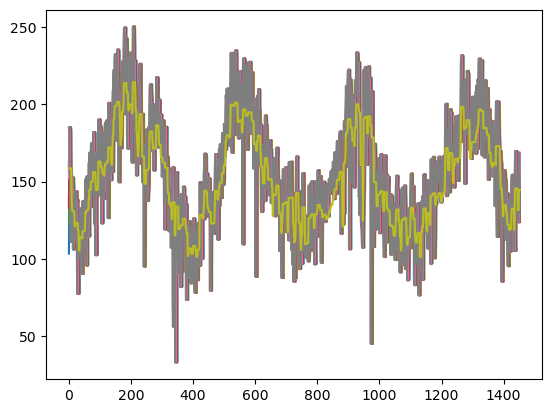

In [65]:
xw=[i for i in range(len(yw))]
yp=model_mhatt_ajahuel.predict(yw)
plt.plot(xw,yw,xw,yp)